<a href="https://colab.research.google.com/github/AnastasiaBrinati/esercizi-PMCSN-23-24/blob/main/esercizio_feedback_simulazione.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install simpy

In [86]:
import simpy
import random
from typing_extensions import NamedTuple
import datetime

In [185]:
RANDOM_SEED = 123
SIM_TIME = 1000  # Simulate until
JOB_SIZE = 1.5

In [151]:
TIMES = {
    'arrival_times' : [],
    'queuing_times' : [],
    'service_times' : []
}

In [5]:
class System(NamedTuple):
    server: simpy.Resource

A SimPy Process can be used like an event (technically, a process actually is an event). If you yield it, you are resumed once the process has finished.

Imagine a car-wash simulation where cars enter the car-wash and wait for the washing process to finish. Or an airport simulation where passengers have to wait until a security check finishes. Or electric vehicles that have to wait until their battery is charged before they can start driving again.

The run process is automatically started when Car is instantiated. A new charge process is started every time the vehicle starts parking.

In [85]:
def feedback():
  # eventual feedback
  beta = 0.2
  r = random.random()
  if(r <= beta):
    # job gets feed back into the system
    return 1
  # job leaves the system
  return 0

In [175]:
def job(env, id, sys):

  flag = True
  while(flag):

    arrival_at_queue = env.now
    print("job " + id + ' arrived at %f' % arrival_at_queue)

    # Enter the queue, candidate ad a request for the server
    with sys.server.request() as my_turn:
      # Wait until it's our turn
      yield my_turn
      time_queued = env.now - arrival_at_queue
      print('job ' + id +' waited for %f' % time_queued)

      # Start the service
      print('job '+id+' starts being served at %f' % env.now)
      yield env.timeout(JOB_SIZE)
      # The service process has finished: Resource released automatically
      print('job '+id+' finished service at %f' % env.now)


    if(not feedback()):
      print("job " + id + " leaving the system at %f " % env.now)
      TIMES['queuing_times'].append(time_queued)
      flag = False

In [166]:
arrival_rate = 0.5

def job_arrivals(env, system):
    id = 0
    """Create new *jobs* until sim time."""
    while True:
        # timeout interarrival times, waiting before generating another job
        yield env.timeout(random.expovariate(arrival_rate))

        # simplifying the example with fixed job size (fixed service times)
        env.process(job(env, str(id), system))
        id += 1

In [186]:
# Setup and start the simulation
print('Prova Simulazione')
random.seed(RANDOM_SEED)
env = simpy.Environment()

# Create system
system = System(
    server = simpy.Resource(env, capacity=1)
)

# Start process and run until sim time
env.process(job_arrivals(env, system))
env.run(until=SIM_TIME)

Prova Simulazione
job 0 arrived at 0.107569
job 0 waited for 0.000000
job 0 starts being served at 0.107569
job 1 arrived at 0.290017
job 2 arrived at 1.335954
job 3 arrived at 1.563860
job 0 finished service at 1.607569
job 0 arrived at 1.607569
job 1 waited for 1.317552
job 1 starts being served at 1.607569
job 1 finished service at 3.107569
job 1 leaving the system at 3.107569 
job 2 waited for 1.771615
job 2 starts being served at 3.107569
job 2 finished service at 4.607569
job 2 leaving the system at 4.607569 
job 3 waited for 3.043709
job 3 starts being served at 4.607569
job 3 finished service at 6.107569
job 3 leaving the system at 6.107569 
job 0 waited for 4.500000
job 0 starts being served at 6.107569
job 4 arrived at 6.193153
job 5 arrived at 6.541056
job 6 arrived at 7.363670
job 0 finished service at 7.607569
job 0 leaving the system at 7.607569 
job 4 waited for 1.414416
job 4 starts being served at 7.607569
job 7 arrived at 8.175990
job 8 arrived at 8.179334
job 4 finis

tempo medio in coda: 14.322711 


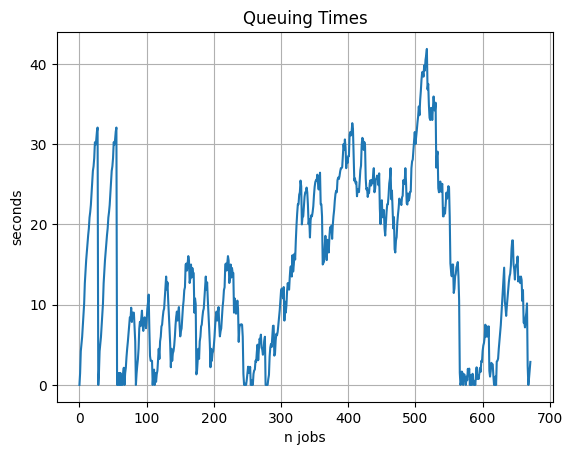

In [187]:
# Analysis/results

queuing_time_avg = sum(TIMES['queuing_times']) / len(TIMES['queuing_times'])
print("tempo medio in coda: %f " % queuing_time_avg)

from matplotlib import pyplot as plt
plt.plot(TIMES['queuing_times'])

plt.ylabel('seconds')
plt.xlabel("n jobs")
plt.title("Queuing Times")
plt.grid()
plt.show()